In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
# 데이터 불러오기
corolla = pd.read_csv("./data/ToyotaCorolla.csv")
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [3]:
corolla.shape

(1436, 37)

In [4]:
# 범주형 변수 확인
corolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

In [5]:
corolla.Fuel_Type.value_counts()

Petrol    1264
Diesel     155
CNG         17
Name: Fuel_Type, dtype: int64

In [6]:
corolla = pd.get_dummies(corolla, columns=['Fuel_Type'])
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,90,1,0,...,0,0,0,1,0,0,0,0,1,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,90,1,0,...,0,0,0,1,0,0,0,0,1,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,90,1,0,...,0,0,0,1,0,0,0,0,1,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,90,0,0,...,0,0,0,1,0,0,0,0,1,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,90,0,0,...,0,1,0,1,0,0,0,0,1,0


In [7]:
# 필요없는 변수 제거
corolla_ = corolla.drop(['Id','Model'], axis=1)

In [8]:
# 상수항 추가
data = sm.add_constant(corolla_, has_constant='add')
data.head()

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0


In [9]:
# y 제외한 컬럼 목록 저장
feature_columns = data.columns.difference(['Price'])
feature_columns

Index(['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic',
       'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider',
       'Boardcomputer', 'CD_Player', 'Central_Lock', 'Cylinders', 'Doors',
       'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Gears',
       'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim',
       'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps', 'Power_Steering',
       'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette',
       'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const'],
      dtype='object')

In [10]:
X = data[feature_columns]
y = data.Price
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 37) (431, 37) (1005,) (431,)


In [11]:
full_model = sm.OLS(train_y, train_x)
fitted_full_model = full_model.fit()

In [12]:
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     323.3
Date:                Fri, 03 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:15:29   Log-Likelihood:                -8405.9
No. Observations:                1005   AIC:                         1.688e+04
Df Residuals:                     972   BIC:                         1.704e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -295.4604    127.839     -2.311      0.021    -546.332     -44.589
Age_08_04         -116.4767      3.945    -29.525      0.000    -124.218    -108.735
Airbag_1           430.8934    258.736      1.665      0.096     -76.852     938.638
Airbag_2          -117.6083    130.628     -0.900      0.368    -373.953     138.737
Airco              211.4627     92.095      2.296      0.022      30.735     392.190
Automatic          224.0210    158.676      1.412      0.158     -87.365     535.407
Automatic_airco   2450.9573    199.070     12.312      0.000    2060.301    2841.614
BOVAG_Guarantee    588.7786    130.083      4.526      0.000     333.503     844.054
Backseat_Divider  -219.4479    129.954     -1.689      0.092    -474.470      35.575
Boardcomputer     -372.7072    121.469     -3.068      0.002    -611.078    -134.336
CD_Player          275.0271    103.316      2.662      0.008      72.280     477.775
Central_Lock      -128.7768    144.699     -0.890      0.374    -412.735     155.181
Cylinders           -0.0355      0.002    -15.076      0.000      -0.040      -0.031
Doors               -5.5958     41.921     -0.133      0.894     -87.862      76.670
Fuel_Type_CNG    -1198.1157    272.487     -4.397      0.000   -1732.847    -663.385
Fuel_Type_Diesel   -78.4611    209.704     -0.374      0.708    -489.985     333.063
Fuel_Type_Petrol  1276.5679    216.769      5.889      0.000     851.179    1701.956
Gears               97.0235    197.616      0.491      0.624    -290.779     484.826
Guarantee_Period    75.3180     14.605      5.157      0.000      46.657     103.979
HP                  13.1120      3.646      3.597      0.000       5.958      20.266
KM                  -0.0162      0.001    -12.393      0.000      -0.019      -0.014
Met_Color            3.0329     77.326      0.039      0.969    -148.712     154.778
Metallic_Rim       150.7136     97.493      1.546      0.122     -40.608     342.036
Mfg_Month          -93.4831     10.419     -8.972      0.000    -113.930     -73.036
Mfg_Year            -0.3159      0.923     -0.342      0.732      -2.128       1.496
Mfr_Guarantee      232.7717     74.634      3.119      0.002      86.309     379.234
Mistlamps          -37.6962    112.406     -0.335      0.737    -258.283     182.891
Power_Steering    -143.5271    291.240     -0.493      0.622    -715.059     428.004
Powered_Windows    450.4205    145.083      3.105      0.002     165.709     735.132
Quarterly_Tax       12.2552      1.923      6.371      0.000       8.481      16.030
Radio              -28.9254     50.432     -0.574      0.566    -127.894      70.043
Radio_cassette     -28.9254     50.432     -0.574      0.566    -127.894      70.043
Sport_Model        200.2871     90.497      2.213      0.027      22.696     377.879
Tow_Bar           -256.

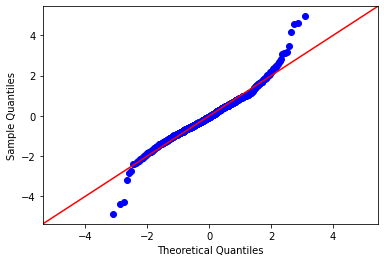

In [13]:
# 잔차
residual = fitted_full_model.resid

fig = sm.qqplot(residual, fit=True, line='45')

Text(0, 0.5, 'Residual')

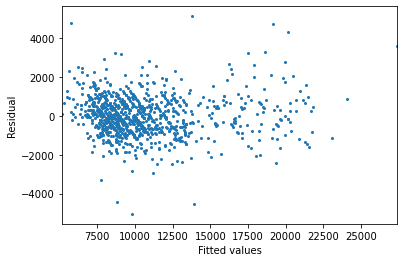

In [14]:
# 모델의 선형성
import matplotlib.pyplot as plt
pred_y = fitted_full_model.predict(train_x)
fig = plt.scatter(pred_y,residual, s=4)
plt.xlim(pred_y.min(),pred_y.max())
plt.xlabel('Fitted values')
plt.ylabel('Residual')

In [15]:
pred_y_full = fitted_full_model.predict(test_x)

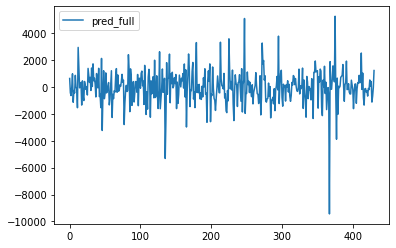

In [16]:
# 잔차 plot
plt.plot(np.array(test_y-pred_y_full),label = 'pred_full')
plt.legend()
plt.show()

In [18]:
# MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true=test_y, y_pred=pred_y_full)

1554278.281102209

---
---

## 변수선택법(R 이용)

```r
# caret 패키지 설치 및 불러오기
install.packages("caret",dependencies = c("Depends","Suggests"))
install.packages("gower")
install.packages("caret.dummyVars")
install.packages('ModelMetrics')
library(caret)

# 데이터 불러오기
corolla <- read.csv('./data/ToyotaCorolla.csv')
head(corolla)
str(corolla)

# one-hot-encoding
corolla <- transform(corolla,
                    Fuel_CNG = ifelse(Fuel_Type=='CNG',1,0),
                    Fuel_Diesel = ifelse(Fuel_Type=='Diesel',1,0),
                    Fuel_Pretrol = ifelse(Fuel_Type=='Pretrol',1,0))


# 필요없는 열 제거
corolla$Fuel_Type <- NULL
corolla[,c('Id','Model')] <- NULL
head(corolla)

# full.model 과 min.model
full.model <- lm(Price~., data=corolla) #모든 변수 포함 모델
min.model <- lm(Price~1, data=corolla) # 상수항만 있는 모델

# 변수선택법 - 전진선택법
forward.model <- step(min.model, direction='forward', scope=list(lower=min.model, upper=full.model))
formula(forward.model)
length(forward.model$model)
summary(forward.model)

# 변수선택법 - 후진소거법
backward.model <- step(full.model, direction='backward')
formula(backward.model)
length(backward.model$model)
summary(backward.model)

# 변수선택법 - 단계적선택법
full.model <- lm(Price~., data= corolla)
stepwise.model <- step(full.model, direction='both')
formula(stepwise.model)
length(names(stepwise.model$model))
summary(stepwise.model)
```

```r
# stepwise 결과
> formula(stepwise.model)
Price ~ Age_08_04 + Mfg_Month + KM + HP + Automatic + cc + Quarterly_Tax + 
    Weight + Mfr_Guarantee + BOVAG_Guarantee + Guarantee_Period + 
    ABS + Airco + Automatic_airco + Boardcomputer + CD_Player + 
    Powered_Windows + Sport_Model + Backseat_Divider + Metallic_Rim + 
    Tow_Bar + Fuel_CNG + Fuel_Diesel
> length(names(stepwise.model$model))
[1] 24
```

### python으로 다시 모델 적합후 평가
- columns 추가해줄때 const(상수항) 잊지 않도록 주의!

In [21]:
# const 잊지말자!
stepwise_columns = ['Age_08_04', 'Mfg_Month' , 'KM' , 'HP' , 'Automatic' , 'cc' , 'Quarterly_Tax', 
                    'Weight' , 'Mfr_Guarantee' , 'BOVAG_Guarantee' , 'Guarantee_Period' , 
                    'ABS' , 'Airco' , 'Automatic_airco' , 'Boardcomputer' , 'CD_Player' , 
                    'Powered_Windows' , 'Sport_Model' , 'Backseat_Divider' , 'Metallic_Rim' , 
                    'Tow_Bar' , 'Fuel_Type_CNG', 'Fuel_Type_Diesel','const']

In [22]:
len(stepwise_columns)

24

In [23]:
X = data[stepwise_columns]
y = data.Price
train_x2, test_x2, train_y2, test_y2 = train_test_split(X, y, train_size=0.7, test_size=0.3)
print(train_x2.shape, test_x2.shape, train_y2.shape, test_y2.shape)

(1005, 24) (431, 24) (1005,) (431,)


In [24]:
stepwise_model = sm.OLS(train_y2, train_x2)
fitted_stepwise_model = stepwise_model.fit()

In [25]:
fitted_stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     418.0
Date:                Fri, 03 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:19:50   Log-Likelihood:                -8490.9
No. Observations:                1005   AIC:                         1.703e+04
Df Residuals:                     981   BIC:                         1.715e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age_08_04         -112.9772      4.085    -27.659      0.000    -120.993    -104.962
Mfg_Month          -90.4831     11.130     -8.129      0.000    -112.325     -68.641
KM                  -0.0189      0.001    -13.929      0.000      -0.022      -0.016
HP                  22.9100      3.716      6.166      0.000      15.619      30.201
Automatic          248.5767    162.250      1.532      0.126     -69.820     566.974
cc                  -0.0901      0.080     -1.119      0.263      -0.248       0.068
Quarterly_Tax       13.0212      1.866      6.977      0.000       9.359      16.684
Weight              10.8937      1.171      9.307      0.000       8.597      13.191
Mfr_Guarantee      183.1910     79.308      2.310      0.021      27.559     338.823
BOVAG_Guarantee    591.1271    134.737      4.387      0.000     326.722     855.533
Guarantee_Period    74.3380     14.724      5.049      0.000      45.444     103.232
ABS               -303.7136    107.513     -2.825      0.005    -514.695     -92.733
Airco              175.4849     94.667      1.854      0.064     -10.288     361.258
Automatic_airco   2672.9870    196.316     13.616      0.000    2287.739    3058.235
Boardcomputer     -193.2576    128.062     -1.509      0.132    -444.564      58.049
CD_Player          226.3413    103.673      2.183      0.029      22.895     429.788
Powered_Windows    408.1254     90.730      4.498      0.000     230.078     586.173
Sport_Model        347.2023     91.902      3.778      0.000     166.855     527.549
Backseat_Divider  -264.2317    127.745     -2.068      0.039    -514.916     -13.547
Metallic_Rim       219.6062     98.302      2.234      0.026      26.700     412.512
Tow_Bar           -208.5176     85.570     -2.437      0.015    -376.439     -40.596
Fuel_Type_CNG    -1923.2456    370.806     -5.187      0.000   -2650.910   -1195.581
Fuel_Type_Diesel  -690.4709    300.090     -2.301      0.022   -1279.363    -101.579
const             2972.8165   1234.798      2.408      0.016     549.667    5395.966
==============================================================================
Omnibus:                       98.315   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              665.413
Skew:                           0.030   Prob(JB):                    3.22e-145
Kurtosis:                       6.986   Cond. No.                     2.67e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 모델 평가

In [26]:
print(fitted_full_model.rsquared)
print(fitted_stepwise_model.rsquared)

0.9141133965359948
0.9074155937127389


In [27]:
print(fitted_full_model.aic)
print(fitted_stepwise_model.aic)

16877.85868248174
17029.809132603506


In [28]:
print(fitted_full_model.mse_total)
print(fitted_stepwise_model.mse_total)

12560448.984172761
13798570.033147015


In [31]:
pred_y_stepwise = fitted_stepwise_model.predict(test_x2)

In [32]:
perf_mat = pd.DataFrame(columns=["ALL","STEPWISE"],
                        index =['MSE', 'RMSE','MAE', 'MAPE'])

In [36]:
from sklearn import metrics
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y,pred_y_full)
perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y,pred_y_full))
perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y,pred_y_full)
perf_mat.loc['MAPE']['ALL'] = metrics.mean_absolute_percentage_error(test_y,pred_y_full)

In [37]:
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y2,pred_y_stepwise)
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y2,pred_y_stepwise))
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y2,pred_y_stepwise)
perf_mat.loc['MAPE']['STEPWISE'] = metrics.mean_absolute_percentage_error(test_y2,pred_y_stepwise)

In [38]:
perf_mat

,ALL,STEPWISE
MSE,1.55428e+06,1.08637e+06
RMSE,1246.71,1042.29
MAE,863.636,792.09
MAPE,0.0845726,0.0808158
